# Feature Engineering & Logistic Regression: Example Use Case (Fintech Product, Marketing)

This notebook serves as an example of feature engineering using the bank marketing campaign data for a Portuguese banking institution.  

As per the original description for this dataset:

"The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed."

https://archive.ics.uci.edu/dataset/222/bank+marketing

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import os
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [ ]:
# mount drive if not already mounted
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
#Import Data
source_train = '/content/drive/MyDrive/Colab Notebooks/MIDS-F207/MISC/demo_logistic_fintech/train.xlsx'
source_test = '/content/drive/MyDrive/Colab Notebooks/MIDS-F207/MISC/demo_logistic_fintech/test.xlsx'

In [ ]:
source_train_df = pd.ExcelFile(source_train)
source_test_df = pd.ExcelFile(source_test)

In [ ]:
print(source_train_df.sheet_names)
print(source_test_df.sheet_names)

['train']
['test']


In [ ]:
# train
train = source_train_df.parse()
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31.0,blue-collar,single,secondary,no,-806,yes,yes,cellular,24,jul,205,3,NaN,0,unknown,no
1,58.0,technician,single,secondary,no,8600,yes,no,cellular,18,nov,61,1,NaN,0,unknown,no
2,50.0,admin.,married,secondary,no,512,yes,yes,cellular,17,apr,77,3,338.0,3,failure,no
3,59.0,retired,married,secondary,no,184,no,no,cellular,8,jul,163,1,NaN,0,unknown,no
4,46.0,management,married,unknown,no,876,yes,no,cellular,31,jul,11,3,NaN,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,36.0,unemployed,single,tertiary,no,221,no,no,cellular,3,feb,225,4,NaN,0,unknown,no
29996,48.0,blue-collar,married,secondary,no,893,no,NaN,cellular,13,aug,62,2,NaN,0,unknown,no
29997,34.0,technician,married,secondary,no,2467,no,no,cellular,3,feb,368,1,NaN,0,unknown,no
29998,34.0,blue-collar,married,secondary,no,7,yes,yes,cellular,2,feb,171,2,193.0,2,other,no


In [ ]:
# test
test = source_test_df.parse()
test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,41.0,management,married,tertiary,yes,852,yes,yes,cellular,27,aug,157,10,NaN,0,unknown,no
1,47.0,management,single,tertiary,no,86,no,no,cellular,30,apr,387,3,87.0,1,success,yes
2,52.0,admin.,married,secondary,no,4233,no,no,unknown,11,jun,158,2,NaN,0,unknown,no
3,40.0,services,single,secondary,no,573,yes,no,cellular,14,may,329,1,NaN,0,unknown,no
4,NaN,services,married,secondary,no,1970,yes,NaN,unknown,8,jun,30,1,404.0,2,success,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,44.0,management,married,unknown,no,2724,no,no,cellular,28,dec,893,1,NaN,0,unknown,yes
4996,27.0,blue-collar,single,secondary,no,484,yes,no,cellular,15,apr,309,2,NaN,0,unknown,no
4997,35.0,blue-collar,married,secondary,no,975,yes,no,cellular,16,jul,102,1,NaN,0,unknown,no
4998,34.0,blue-collar,married,secondary,no,5304,yes,no,unknown,21,may,51,2,NaN,0,unknown,no


In [ ]:
# check shape

items = (train, test)

for item in items:
    print(item.shape)

(30000, 17)
(5000, 17)


In [ ]:
# % of data for train vs. test
30000/35000, 5000/35000

(0.8571428571428571, 0.14285714285714285)

# EDA

In [ ]:
# Let's get familiarized with our data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        28068 non-null  float64
 1   job        28959 non-null  object 
 2   marital    29053 non-null  object 
 3   education  29517 non-null  object 
 4   default    30000 non-null  object 
 5   balance    30000 non-null  int64  
 6   housing    30000 non-null  object 
 7   loan       28152 non-null  object 
 8   contact    30000 non-null  object 
 9   day        30000 non-null  int64  
 10  month      30000 non-null  object 
 11  duration   30000 non-null  int64  
 12  campaign   30000 non-null  int64  
 13  pdays      4764 non-null   float64
 14  previous   30000 non-null  int64  
 15  poutcome   30000 non-null  object 
 16  y          30000 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 3.9+ MB


In [ ]:
# Identify how many categorical and numerical features there are
categorical_features = train.select_dtypes(include=['object']).columns.tolist()
numerical_features = train.select_dtypes(include=['number']).columns.tolist()

# Print the counts
print(f"Number of categorical features: {len(categorical_features)-1}") # cat output (y)
print(f"Number of numerical features: {len(numerical_features)}")

Number of categorical features: 9
Number of numerical features: 7


In [ ]:
# Check for nulls and get the percent of missing values for each column
for col in train.columns:
  pct_missing = np.mean(train[col].isnull())
  print('{} - {}%'.format(col, round(pct_missing*100)))


age - 6%
job - 3%
marital - 3%
education - 2%
default - 0%
balance - 0%
housing - 0%
loan - 6%
contact - 0%
day - 0%
month - 0%
duration - 0%
campaign - 0%
pdays - 84%
previous - 0%
poutcome - 0%
y - 0%


In [ ]:
# Check the distribution of the most important categorical variable, i.e., our dependent variable y

y_counts = train['y'].value_counts()
print(y_counts)

# Calculate the percentage of each class
y_percentages = round(y_counts / len(train) * 100, 0)
print(y_percentages)

y
no     27043
yes     2957
Name: count, dtype: int64
y
no     90.0
yes    10.0
Name: count, dtype: float64


## Categorical Variables

In [ ]:
# Let's see what the other categorical independent variables are looking like
# Look at the number of categories per each categorical variable

for col in categorical_features:
  print(f"{col}: {train[col].nunique()}")


job: 12
marital: 3
education: 4
default: 2
housing: 2
loan: 2
contact: 3
month: 12
poutcome: 4
y: 2


## Do a deeper dive into the large numbered categorical variables

#### Job

In [ ]:
# Look at the volume of each category in the job variable
# *Let's consider what the low volumes of some categories will mean/result in when we're splitting data during model dev.*

job_counts = train['job'].value_counts()
job_percentages = job_counts / len(train)
job_cumulative_counts = job_counts.cumsum()
job_cumulative_percentages = job_percentages.cumsum()

job_summary = pd.DataFrame({
    'Frequency': job_counts,
    'Percent': job_percentages,
    'Cumulative Frequency': job_cumulative_counts,
    'Cumulative Percent': job_cumulative_percentages
})

print(job_summary)


               Frequency   Percent  Cumulative Frequency  Cumulative Percent
job                                                                         
blue-collar         6408  0.213600                  6408            0.213600
management          6013  0.200433                 12421            0.414033
technician          4880  0.162667                 17301            0.576700
admin.              3330  0.111000                 20631            0.687700
services            2799  0.093300                 23430            0.781000
retired             1267  0.042233                 24697            0.823233
self-employed       1001  0.033367                 25698            0.856600
entrepreneur         960  0.032000                 26658            0.888600
housemaid            806  0.026867                 27464            0.915467
unemployed           787  0.026233                 28251            0.941700
student              525  0.017500                 28776            0.959200

#### Month

In [ ]:
# Look at the volume of each category in the month variable
# Can we combine months in some strategic/meaningful way?

month_counts = train['month'].value_counts()
month_percentages = month_counts / len(train)
month_cumulative_counts = month_counts.cumsum()
month_cumulative_percentages = month_percentages.cumsum()

month_summary = pd.DataFrame({
    'Frequency': month_counts,
    'Percent': month_percentages,
    'Cumulative Frequency': month_cumulative_counts,
    'Cumulative Percent': month_cumulative_percentages
})

print(month_summary)


       Frequency   Percent  Cumulative Frequency  Cumulative Percent
month                                                               
may         9427  0.314233                  9427            0.314233
jul         4816  0.160533                 14243            0.474767
aug         4035  0.134500                 18278            0.609267
jun         3622  0.120733                 21900            0.730000
nov         2666  0.088867                 24566            0.818867
apr         2060  0.068667                 26626            0.887533
feb         1695  0.056500                 28321            0.944033
jan          842  0.028067                 29163            0.972100
oct          295  0.009833                 29458            0.981933
mar          271  0.009033                 29729            0.990967
sep          197  0.006567                 29926            0.997533
dec           74  0.002467                 30000            1.000000


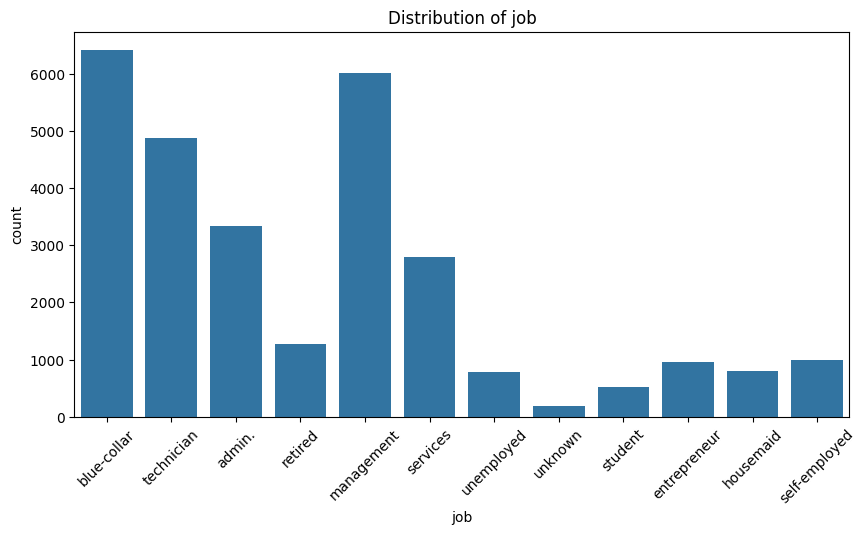

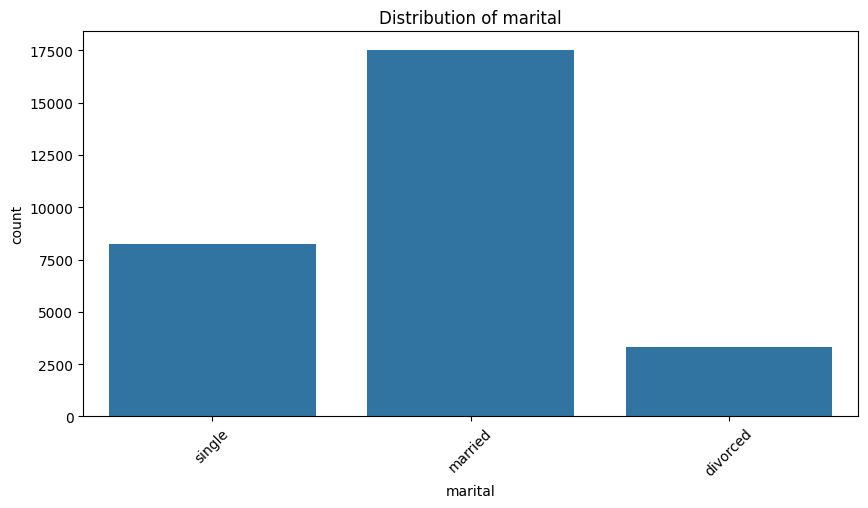

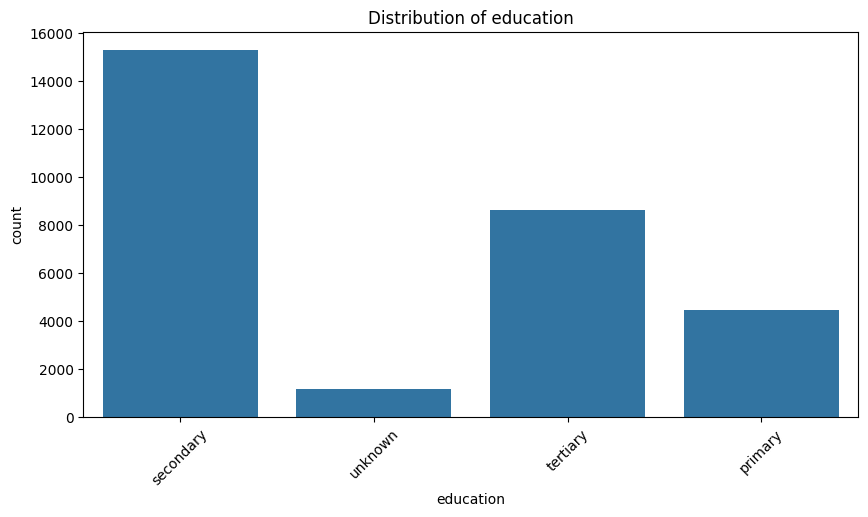

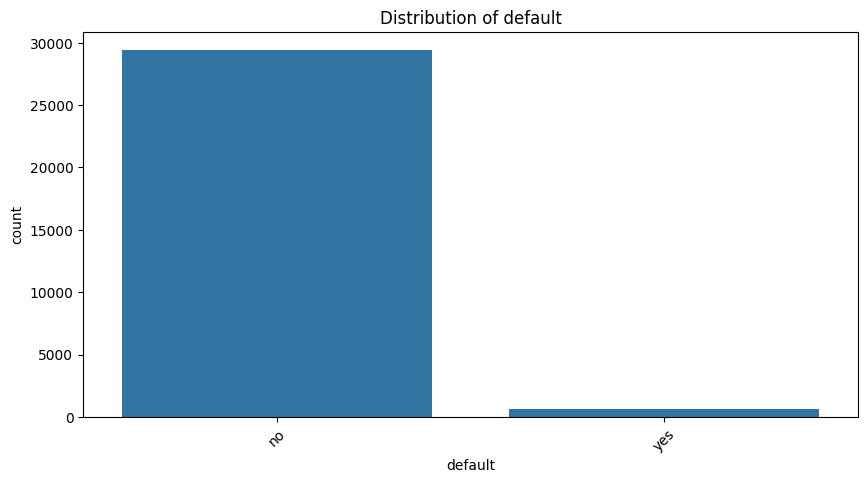

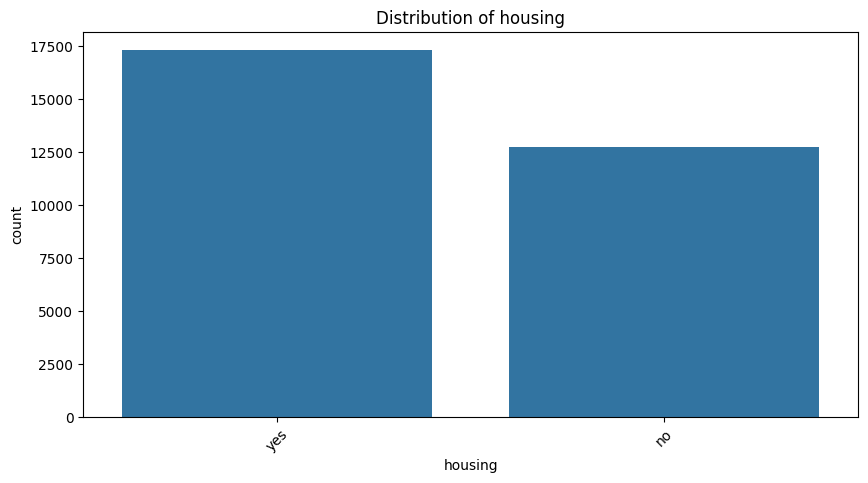

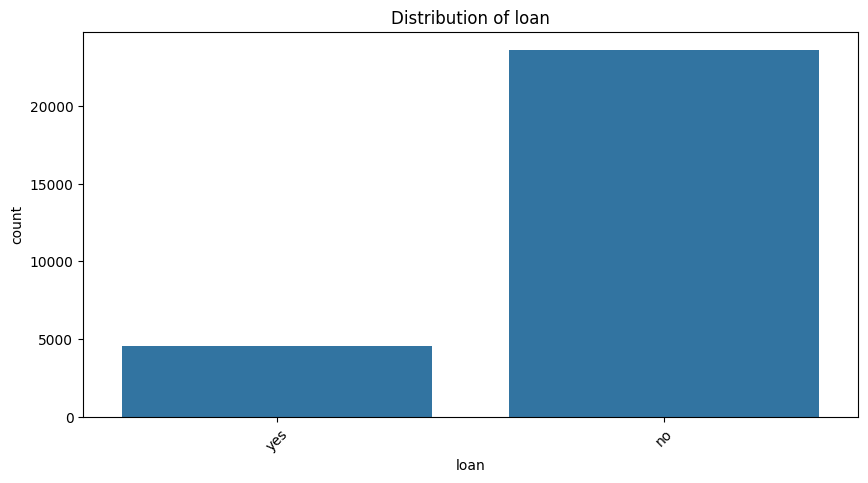

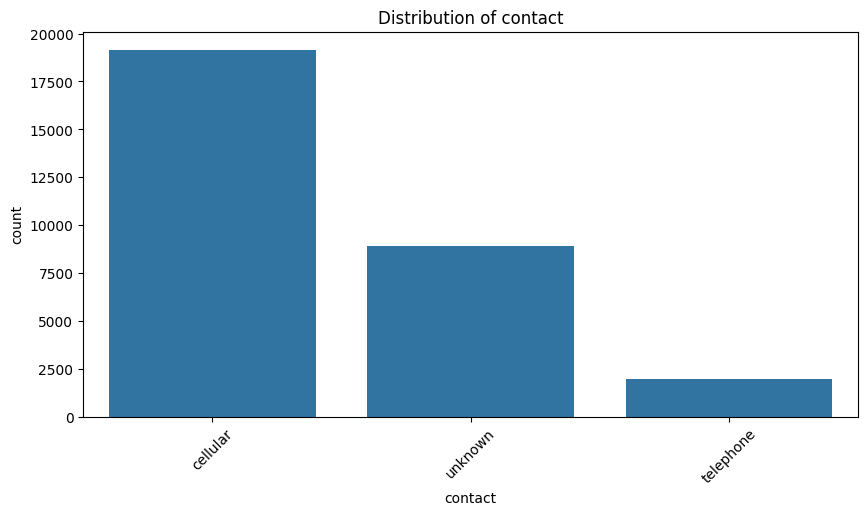

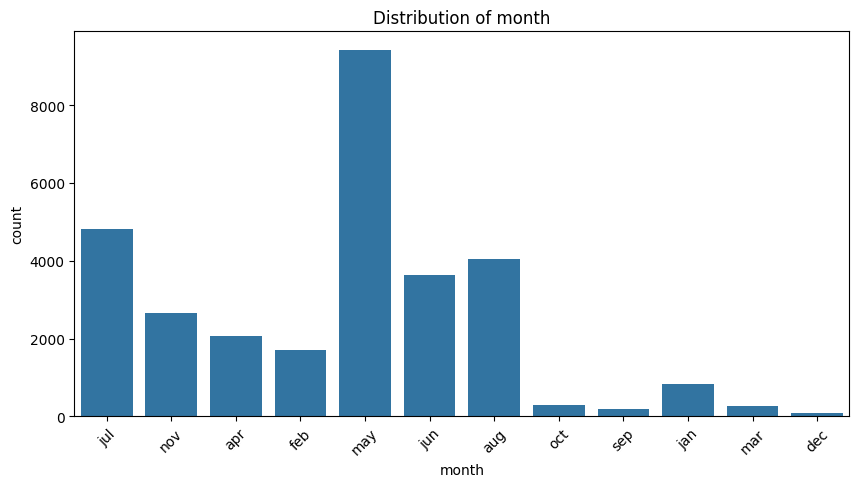

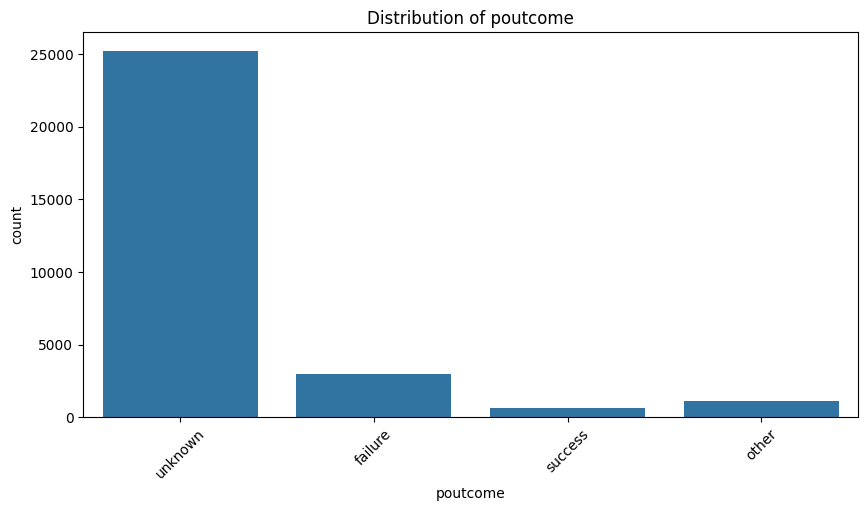

In [ ]:
# Plot distributions of subcategories of each categorical variable

for col in categorical_features:
  if col != 'y':
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=train)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


## Numeric Variables

In [ ]:
# Taking note of the characteristics of our numerical data
# Does the mean make sense in the contex of our use case?

train.describe(include=(np.number))

,age,balance,day,duration,campaign,pdays,previous
count,28068.000000,30000.000000,30000.000000,30000.000000,30000.000000,4764.000000,30000.000000
mean,40.648318,1353.218433,15.902567,255.372800,2.837367,230.701931,0.497933
std,10.135171,2942.336628,8.297476,258.174266,3.228322,108.245232,1.800510
min,18.000000,-3313.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,33.000000,62.000000,8.000000,101.000000,1.000000,150.000000,0.000000
50%,39.000000,429.000000,16.000000,177.000000,2.000000,225.000000,0.000000
75%,48.000000,1412.000000,21.000000,316.000000,3.000000,332.000000,0.000000
max,89.000000,98417.000000,31.000000,3881.000000,63.000000,792.000000,55.000000


#### Percentiles: 1st and 99th

In [ ]:
# Output 1st percentile and 99th percentile for each numeric variable

for col in numerical_features:
  percentile_1 = np.percentile(train[col], 1)
  percentile_99 = np.percentile(train[col], 99)
  print(f"{col}: 1st percentile = {percentile_1:.2f}, 99th percentile = {percentile_99:.2f}")


age: 1st percentile = nan, 99th percentile = nan
balance: 1st percentile = -646.02, 99th percentile = 13338.00
day: 1st percentile = 2.00, 99th percentile = 31.00
duration: 1st percentile = 11.00, 99th percentile = 1262.00
campaign: 1st percentile = 1.00, 99th percentile = 17.00
pdays: 1st percentile = nan, 99th percentile = nan
previous: 1st percentile = 0.00, 99th percentile = 8.00


In [ ]:
# NAN: Age

train["age"].fillna(value=train["age"].median(), inplace=True)

# check
train["age"].isnull().sum()

0

In [ ]:
# Check age again

for col in numerical_features:
  percentile_1 = np.percentile(train[col], 1)
  percentile_99 = np.percentile(train[col], 99)
  print(f"{col}: 1st percentile = {percentile_1:.2f}, 99th percentile = {percentile_99:.2f}")


age: 1st percentile = 24.00, 99th percentile = 65.00
balance: 1st percentile = -646.02, 99th percentile = 13338.00
day: 1st percentile = 2.00, 99th percentile = 31.00
duration: 1st percentile = 11.00, 99th percentile = 1262.00
campaign: 1st percentile = 1.00, 99th percentile = 17.00
pdays: 1st percentile = nan, 99th percentile = nan
previous: 1st percentile = 0.00, 99th percentile = 8.00


In [ ]:
# The 1st percentile and 99th percentile represent the values below which 1% and 99% of the data falls.
# That is:
# - 1st percentile:  1% of the data points in a dataset are below this value.
# - 99th percentile: 99% of the data points in a dataset are below this value.

# These stats are useful for identifying outliers in the data.
# For example, if we see that the 1st percentile for age is 24 and the 99th percentile is 65,
# then we know that most of the data falls within the age range of 24 to 65.
# Any values below 24 or above 65 would be considered outliers.

# Consider:
# *Let's consider flooring and ceiling our data given the above information, so that our data is making business sense.*
# *It is also good to check data stability over time given a time variable to make sure the data we are using to build our model is stable.*

# Feature Engineering

### pdays

In [ ]:
# Check for nulls in pdays
pct_missing_pdays = np.mean(train['pdays'].isnull())
print('pdays - {}%'.format(round(pct_missing_pdays*100)))


pdays - 84%


In [ ]:
# no 0s in pdays
train[train["pdays"] == 0]["pdays"]

,pdays


In [ ]:
# Drop pdays from the dataset

train = train.drop('pdays', axis=1)

In [ ]:
# Check
train.columns, len(train.columns)

(Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
        'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'previous',
        'poutcome', 'y'],
       dtype='object'),
 16)

#### Balance

<ipython-input-28-ddce008f13b2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["balance"], kde=False)


<Axes: xlabel='balance'>

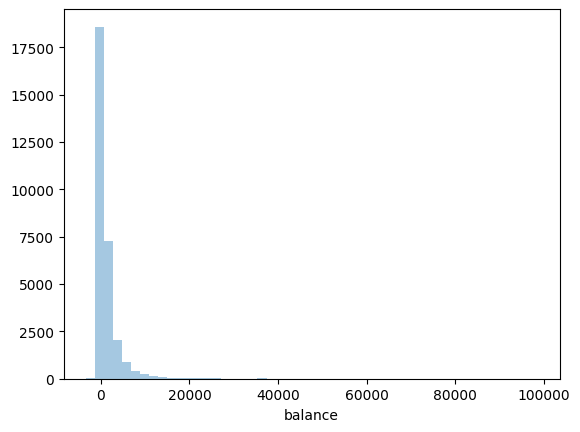

In [ ]:
### balance ###
# Has a long tail

sns.distplot(train["balance"], kde=False)

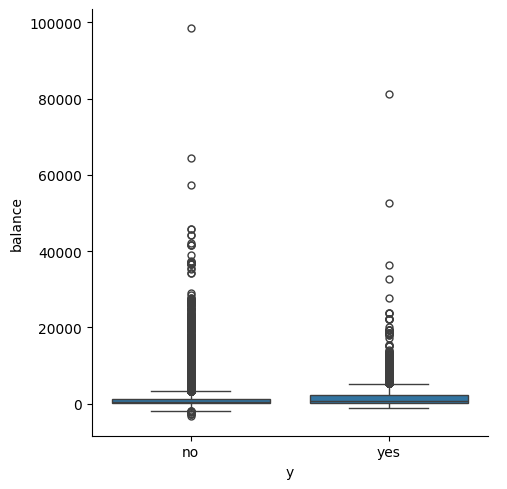

In [ ]:
sns.catplot(x="y", y="balance", kind="box", data=train)

### Flooring and Ceiling

In [ ]:
#### Approach 1 ####

#for col in numerical_features:
for col in [col for col in numerical_features if col != 'pdays']:
  percentile_1 = np.percentile(train[col], 1)
  percentile_99 = np.percentile(train[col], 99)
  train[col] = np.clip(train[col], percentile_1, percentile_99)


In [ ]:
# Check
train["age"].describe()

,age
count,30000.000000
mean,40.481233
std,9.533881
min,24.000000
25%,33.000000
50%,39.000000
75%,47.000000
max,65.000000


In [ ]:
##### Approach 2 #####

## get percentiles ##

print(train[["pdays","age", "balance", "day", "duration", "campaign", "previous"]].quantile(.01))
print("------------------------")
print(train[["pdays","age", "balance", "day", "duration", "campaign", "previous"]].quantile(.99))

In [ ]:
## flooring ###
train.loc[train["age"] < 24.00, "age"] = 24.00
train.loc[train["balance"] < -646.02, "balance"] = -646.02
train.loc[train["day"] < 2.00, "day"] = 2.00
train.loc[train["duration"] < 11.00, "duration"] = 11.00
train.loc[train["campaign"] < 1.00, "campaign"] = 1.00

In [ ]:
### ceiling ###
train.loc[train["age"] > 65.0, "age"] = 65.0
train.loc[train["balance"] > 13338.0, "balance"] = 13338.0
train.loc[train["day"] > 31.0, "day"] = 31.0
train.loc[train["duration"] > 1262.0, "duration"] = 1262.0
train.loc[train["campaign"] > 17.0, "campaign"] = 17.0

<ipython-input-34-0f6525fb6e42>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["balance"], kde=False)


<Axes: xlabel='balance'>

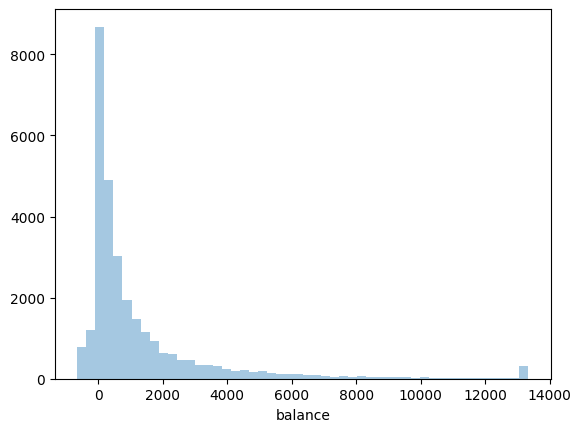

In [ ]:
### After flooring/ceiling: Check ###

sns.distplot(train["balance"], kde=False)
#sns.distplot(train["age"], kde=False)

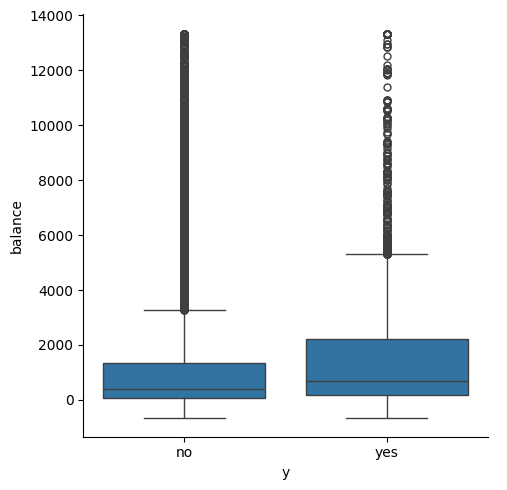

In [ ]:
sns.catplot(x="y", y="balance", kind="box", data=train)
#sns.catplot(x="y", y="age", kind="box", data=train)

### Categorical Variables

In [ ]:
# Another look at our categorical data
train.describe(include=[object])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,28959,29053,29517,30000,30000,28152,30000,30000,30000,30000
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,6408,17531,15276,29390,17283,23573,19149,9427,25236,27043


#### Job

In [ ]:
#### Job: NAN ######

print(train["job"].value_counts(dropna=False))

train["job"].fillna(value="missing", inplace=True)

print(train["job"].value_counts())

job
blue-collar      6408
management       6013
technician       4880
admin.           3330
services         2799
retired          1267
NaN              1041
self-employed    1001
entrepreneur      960
housemaid         806
unemployed        787
student           525
unknown           183
Name: count, dtype: int64
job
blue-collar      6408
management       6013
technician       4880
admin.           3330
services         2799
retired          1267
missing          1041
self-employed    1001
entrepreneur      960
housemaid         806
unemployed        787
student           525
unknown           183
Name: count, dtype: int64


In [ ]:
# Using odds to indicate what categories to combine
# The latter helps us understand the association between the categorical variable and the probability of the dependent variable being "yes".

# Here's why:

# 1. Odds Ratio:
#    - For each category of the categorical variable, we can calculate the odds of the dependent variable being "yes".
#    - The odds ratio compares the odds of "yes" for one category to the odds of "yes" for another category.

# 2. Identifying Similar Odds:
#    - If two categories have similar odds ratios, it suggests that they have a similar impact on the probability of "yes".
#    - This indicates that we can potentially combine these categories without losing significant information about the relationship with the dependent variable.

# 3. Reducing Complexity:
#    - By combining categories with similar odds ratios, we reduce the number of levels in our categorical variable, making our model simpler and potentially more robust.

# 4. Improving Model Performance:
#    - In some cases, combining categories with similar odds ratios can improve the predictive performance of our model, especially when dealing with limited data or high-cardinality categorical variables.

# Example:
# Let's say we have a categorical variable "education" with levels "primary", "secondary", "tertiary".
# If we find that the odds of "yes" for "primary" and "secondary" education are similar, we might consider combining them into a single category "lower education".


In [ ]:
### Job ####

# crosstab
#train.groupby(["job"])["y"].value_counts()

#no     26120
#yes     2839 ~11%
#train.groupby(["y"])["job"].count()

# Probability:  number of favorable outcomes divided by the total number of outcomes
# Odds: probability of the event occurring = 0.80, ---> 0.80 / (1-0.80) = 0.80/0.20 = 4 (i.e., 4 to 1)

job_odds = pd.crosstab(train.job, train.y, margins=True, margins_name="Total").reset_index()
job_odds["probability"] = 0
job_odds["odds"] = 0
job_odds

job_odds["probability"] = job_odds.apply(lambda x: x['yes']/x['Total'], axis=1)
job_odds["odds"] = job_odds.apply(lambda x: x['probability']/(1-x['probability']), axis=1)
job_odds

y,job,no,yes,Total,probability,odds
0,admin.,2953,377,3330,0.113213,0.127667
1,blue-collar,5990,418,6408,0.065231,0.069783
2,entrepreneur,884,76,960,0.079167,0.085973
3,housemaid,744,62,806,0.076923,0.083333
4,management,5330,683,6013,0.113587,0.128143
5,missing,923,118,1041,0.113353,0.127844
6,retired,1021,246,1267,0.194159,0.240940
7,self-employed,909,92,1001,0.091908,0.101210
8,services,2606,193,2799,0.068953,0.074060
9,student,410,115,525,0.219048,0.280488


<ipython-input-39-4a4f0c2d0d36>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=70)


<Axes: xlabel='job', ylabel='odds'>

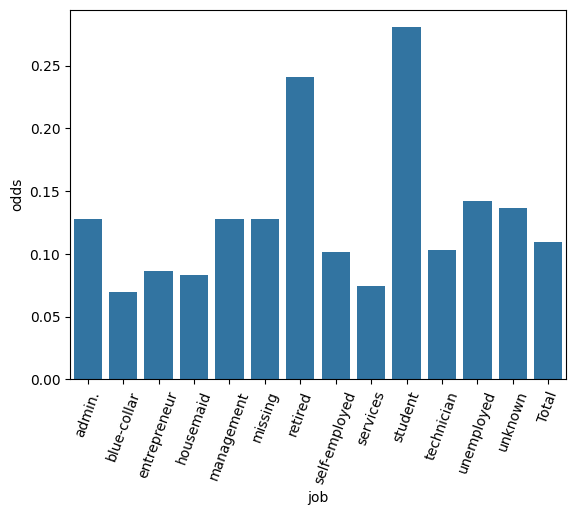

In [ ]:
g = sns.barplot(x='job', y='odds', data=job_odds)
g.set_xticklabels(g.get_xticklabels(),rotation=70)
g

In [ ]:
# Jobs: combine cats

#train["job_edited"] = ""

train.loc[(train["job"] == "blue-collar") | (train["job"] == "services") | (train["job"] == "entrepreneur")|\
         (train["job"] == "housemaid"), "job"] = "combined-class"
train


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y
0,31.0,combined-class,single,secondary,no,-646.02,yes,yes,cellular,24,jul,205,3,0,unknown,no
1,58.0,technician,single,secondary,no,8600.00,yes,no,cellular,18,nov,61,1,0,unknown,no
2,50.0,admin.,married,secondary,no,512.00,yes,yes,cellular,17,apr,77,3,3,failure,no
3,59.0,retired,married,secondary,no,184.00,no,no,cellular,8,jul,163,1,0,unknown,no
4,46.0,management,married,unknown,no,876.00,yes,no,cellular,31,jul,11,3,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,36.0,unemployed,single,tertiary,no,221.00,no,no,cellular,3,feb,225,4,0,unknown,no
29996,48.0,combined-class,married,secondary,no,893.00,no,NaN,cellular,13,aug,62,2,0,unknown,no
29997,34.0,technician,married,secondary,no,2467.00,no,no,cellular,3,feb,368,1,0,unknown,no
29998,34.0,combined-class,married,secondary,no,7.00,yes,yes,cellular,2,feb,171,2,2,other,no


#### Month

In [ ]:
#### month ####

month_odds = pd.crosstab(train.month, train.y, margins=True, margins_name="Total").reset_index()
month_odds["probability"] = 0
month_odds["odds"] = 0
month_odds

month_odds["probability"] = month_odds.apply(lambda x: x['yes']/x['Total'], axis=1)
month_odds["odds"] = month_odds.apply(lambda x: x['probability']/(1-x['probability']), axis=1)
month_odds


y,month,no,yes,Total,probability,odds
0,apr,1674,386,2060,0.187379,0.230585
1,aug,3689,346,4035,0.085750,0.093792
2,dec,41,33,74,0.445946,0.804878
3,feb,1463,232,1695,0.136873,0.158578
4,jan,782,60,842,0.071259,0.076726
5,jul,4442,374,4816,0.077658,0.084196
6,jun,3285,337,3622,0.093043,0.102588
7,mar,135,136,271,0.501845,1.007407
8,may,8850,577,9427,0.061207,0.065198
9,nov,2437,229,2666,0.085896,0.093968


<ipython-input-42-e2e33df0d605>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(),rotation=70)


<Axes: xlabel='month', ylabel='odds'>

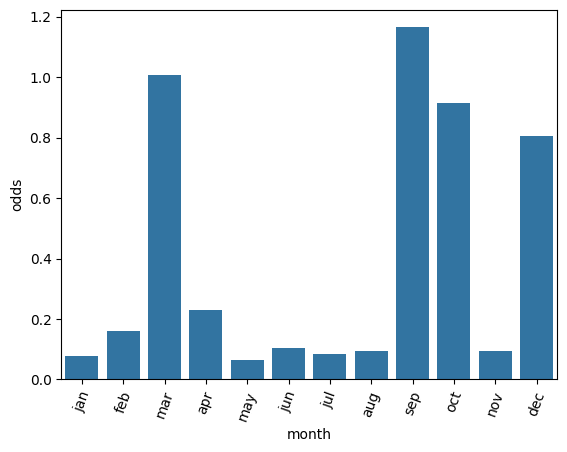

In [ ]:
#plot
g = sns.barplot(x='month', y='odds', data=month_odds, order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
g.set_xticklabels(g.get_xticklabels(),rotation=70)
g


In [ ]:
## Month: turn to Quarters ##

train["quarter"] = 0

train.loc[(train["month"] == "jan")|\
          (train["month"] == "feb")|\
          (train["month"] == "mar"), "quarter"] = 1

train.loc[(train["month"] == "apr")|\
          (train["month"] == "may")|\
          (train["month"] == "jun"), "quarter"] = 2

train.loc[(train["month"] == "jul")|\
          (train["month"] == "aug")|\
          (train["month"] == "sep"), "quarter"] = 3

train.loc[(train["month"] == "oct")|\
          (train["month"] == "nov")|\
          (train["month"] == "dec"), "quarter"] = 4

train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y,quarter
0,31.0,combined-class,single,secondary,no,-646.02,yes,yes,cellular,24,jul,205,3,0,unknown,no,3
1,58.0,technician,single,secondary,no,8600.00,yes,no,cellular,18,nov,61,1,0,unknown,no,4
2,50.0,admin.,married,secondary,no,512.00,yes,yes,cellular,17,apr,77,3,3,failure,no,2
3,59.0,retired,married,secondary,no,184.00,no,no,cellular,8,jul,163,1,0,unknown,no,3
4,46.0,management,married,unknown,no,876.00,yes,no,cellular,31,jul,11,3,0,unknown,no,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,36.0,unemployed,single,tertiary,no,221.00,no,no,cellular,3,feb,225,4,0,unknown,no,1
29996,48.0,combined-class,married,secondary,no,893.00,no,NaN,cellular,13,aug,62,2,0,unknown,no,3
29997,34.0,technician,married,secondary,no,2467.00,no,no,cellular,3,feb,368,1,0,unknown,no,1
29998,34.0,combined-class,married,secondary,no,7.00,yes,yes,cellular,2,feb,171,2,2,other,no,1


In [ ]:
######### other nulls ##########

train.isnull().sum()

,0
age,0
job,0
marital,947
education,483
default,0
balance,0
housing,0
loan,1848
contact,0
day,0


In [ ]:
##### marital #########

train.groupby("y")["marital"].value_counts(dropna=False)

y    marital 
no   married     16076
     single       7154
     divorced     2955
     NaN           858
yes  married      1455
     single       1065
     divorced      348
     NaN            89
Name: count, dtype: int64

In [ ]:
##### education #########

train.groupby("y")["education"].value_counts(dropna=False)

y    education
no   secondary    13904
     tertiary      7497
     primary       4155
     unknown       1053
     NaN            434
yes  secondary     1372
     tertiary      1104
     primary        318
     unknown        114
     NaN             49
Name: count, dtype: int64

In [ ]:
##### loan #########

train.groupby("y")["loan"].value_counts(dropna=False)

y    loan
no   no      21054
     yes      4299
     NaN      1690
yes  no       2519
     yes       280
     NaN       158
Name: count, dtype: int64

In [ ]:
##### y #########

train["y"].value_counts(dropna=False)

,count
y,
no,27043
yes,2957


In [ ]:
########### Fill in "missing": marital, ed, and loan ###############

train["marital"].fillna(value="missing_mar", inplace=True)
train["education"].fillna(value="missing_ed", inplace=True)
train["loan"].fillna(value="missing_loan", inplace=True)
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y,quarter
0,31.0,combined-class,single,secondary,no,-646.02,yes,yes,cellular,24,jul,205,3,0,unknown,no,3
1,58.0,technician,single,secondary,no,8600.00,yes,no,cellular,18,nov,61,1,0,unknown,no,4
2,50.0,admin.,married,secondary,no,512.00,yes,yes,cellular,17,apr,77,3,3,failure,no,2
3,59.0,retired,married,secondary,no,184.00,no,no,cellular,8,jul,163,1,0,unknown,no,3
4,46.0,management,married,unknown,no,876.00,yes,no,cellular,31,jul,11,3,0,unknown,no,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,36.0,unemployed,single,tertiary,no,221.00,no,no,cellular,3,feb,225,4,0,unknown,no,1
29996,48.0,combined-class,married,secondary,no,893.00,no,missing_loan,cellular,13,aug,62,2,0,unknown,no,3
29997,34.0,technician,married,secondary,no,2467.00,no,no,cellular,3,feb,368,1,0,unknown,no,1
29998,34.0,combined-class,married,secondary,no,7.00,yes,yes,cellular,2,feb,171,2,2,other,no,1


In [ ]:
train.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


## Finalizing Features

### Dummies

In [ ]:
# List current categorical variables

categorical_features = train.select_dtypes(include=['object']).columns.tolist()
print(categorical_features)


['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [ ]:
trainF = pd.get_dummies(data=train, columns=['job','marital','education','default','housing','loan','contact','quarter','poutcome','y'], dtype='int', drop_first=True).copy()

In [ ]:
trainF

,age,balance,day,month,duration,campaign,previous,job_combined-class,job_management,job_missing,...,loan_yes,contact_telephone,contact_unknown,quarter_2,quarter_3,quarter_4,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,31.0,-646.02,24,jul,205,3,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1,58.0,8600.00,18,nov,61,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,50.0,512.00,17,apr,77,3,3,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,59.0,184.00,8,jul,163,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,46.0,876.00,31,jul,11,3,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,36.0,221.00,3,feb,225,4,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29996,48.0,893.00,13,aug,62,2,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
29997,34.0,2467.00,3,feb,368,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
29998,34.0,7.00,2,feb,171,2,2,1,0,0,...,1,0,0,0,0,0,1,0,0,0


In [ ]:
trainF.columns

Index(['age', 'balance', 'day', 'month', 'duration', 'campaign', 'previous',
       'job_combined-class', 'job_management', 'job_missing', 'job_retired',
       'job_self-employed', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_missing_mar',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_no', 'loan_yes', 'contact_telephone', 'contact_unknown',
       'quarter_2', 'quarter_3', 'quarter_4', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'y_yes'],
      dtype='object')

In [ ]:
# Drop month from trainF

trainF = trainF.drop('month', axis=1)

In [ ]:
trainF.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'previous',
       'job_combined-class', 'job_management', 'job_missing', 'job_retired',
       'job_self-employed', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_missing_mar',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_no', 'loan_yes', 'contact_telephone', 'contact_unknown',
       'quarter_2', 'quarter_3', 'quarter_4', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'y_yes'],
      dtype='object')

In [ ]:
# Drop day from the train dataset

trainF = trainF.drop('day', axis=1)


In [ ]:
trainF.columns

Index(['age', 'balance', 'duration', 'campaign', 'previous',
       'job_combined-class', 'job_management', 'job_missing', 'job_retired',
       'job_self-employed', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_missing_mar',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_no', 'loan_yes', 'contact_telephone', 'contact_unknown',
       'quarter_2', 'quarter_3', 'quarter_4', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'y_yes'],
      dtype='object')

In [ ]:
len(trainF.columns)

34